In [1]:
#This program detects breast cancer, based on data.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data
breast_data = pd.read_csv("breast-cancer.csv")
breast_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
#count number of rows and columns in dataset
breast_data.shape

(569, 33)

In [4]:
#count number of empty values of each column
breast_data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
#drop id an completely empty unnamed column
breast_data = breast_data.drop('Unnamed: 32', axis=1)
breast_data = breast_data.drop('id', axis=1)

In [6]:
breast_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
breast_data.shape

(569, 31)

In [8]:
#Number of malignant and benign cells
breast_data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

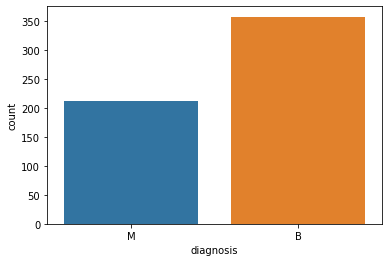

In [9]:
#visualize the data count
sns.countplot(breast_data['diagnosis'], label='count')

In [10]:
#check data types to identify which values to encode to numbers
breast_data.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [11]:
#As identified above the diagnosis column needs to be encoded
from sklearn.preprocessing import LabelEncoder

diagnosis_encoder = LabelEncoder()
#convert the first column into 0s and 1s
breast_data.iloc[:,0] = diagnosis_encoder.fit_transform(breast_data.iloc[:,0].values)

In [12]:
breast_data.dtypes

diagnosis                    int32
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

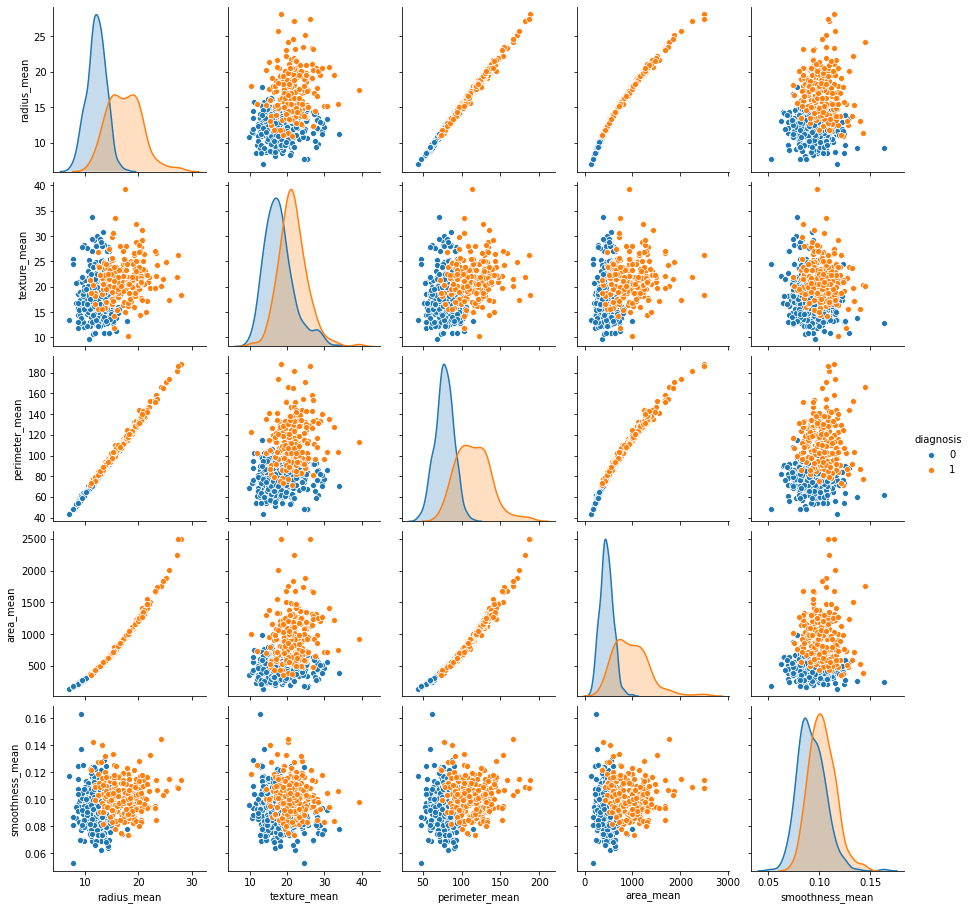

In [13]:
#create a pair plot
sns.pairplot(breast_data.iloc[:,0:6], hue='diagnosis')

In [14]:
breast_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
#Get correlations of data with every column
breast_data.iloc[:,0:12].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379


<AxesSubplot:>

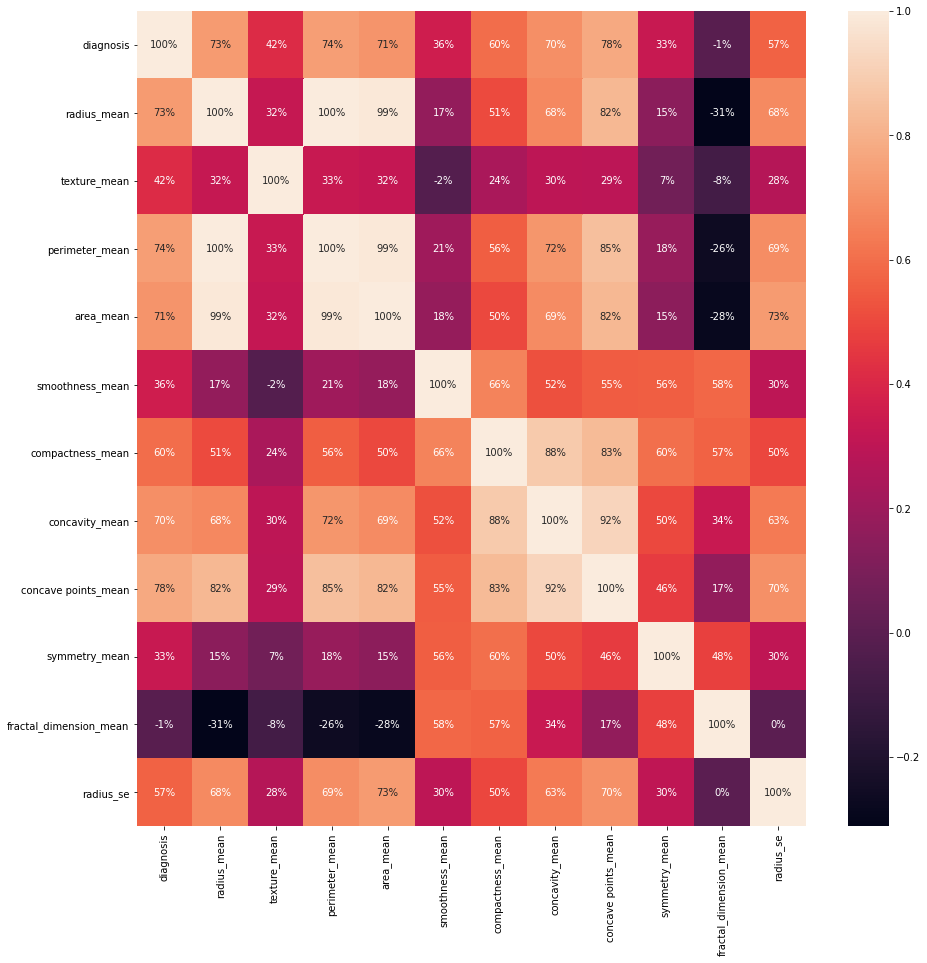

In [16]:
#Visualize correlation
plt.figure(figsize=(15, 15))
sns.heatmap(breast_data.iloc[:,0:12].corr(), annot=True, fmt='.0%')

In [17]:
#spitting data into input and output datasets
X = breast_data.iloc[:,1:].values
y = breast_data.iloc[:,0].values

In [18]:
#split data into 75%, 25% train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [19]:
#scale data to bring all values to same range
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

X_train

array([[-0.65079907, -0.43057322, -0.68024847, ..., -0.36433881,
         0.32349851, -0.7578486 ],
       [-0.82835341,  0.15226547, -0.82773762, ..., -1.45036679,
         0.62563098, -1.03071387],
       [ 1.68277234,  2.18977235,  1.60009756, ...,  0.72504581,
        -0.51329768, -0.96601386],
       ...,
       [-1.33114223, -0.22172269, -1.3242844 , ..., -0.98806491,
        -0.69995543, -0.12266325],
       [-1.25110186, -0.24600763, -1.28700242, ..., -1.75887319,
        -1.56206114, -1.00989735],
       [-0.74662205,  1.14066273, -0.72203706, ..., -0.2860679 ,
        -1.24094654,  0.2126516 ]])

In [20]:
def model(X_train, y_train):
    #Logistic Regression
    from sklearn.linear_model import LogisticRegression
    logistic_reg = LogisticRegression(random_state = 0)
    logistic_reg.fit(X_train, y_train)
    
    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    decision_tree = DecisionTreeClassifier(criterion='entropy', random_state = 0)
    decision_tree.fit(X_train, y_train)
    
    #Support Vector Machines
    from sklearn import svm
    support_vm = svm.SVC(kernel='linear', C=1)
    support_vm.fit(X_train, y_train)
    
    #Random Forest
    from sklearn.ensemble import RandomForestClassifier
    random_for = RandomForestClassifier(n_estimators = 10, criterion='entropy', random_state = 0)
    random_for.fit(X_train, y_train)
    
    #Print model accuracy for the training data
    print("Logistic Regression Training Accuracy:", logistic_reg.score(X_train, y_train))
    print("Decision Tree Training Accuracy:", decision_tree.score(X_train, y_train))
    print("SVM Training Accuracy:", support_vm.score(X_train, y_train))
    print("Random Forest Training Accuracy:", random_for.score(X_train, y_train))
    
    return logistic_reg, decision_tree, support_vm, random_for

In [21]:
#getting all of the models
all_models = model(X_train, y_train)

Logistic Regression Training Accuracy: 0.9906103286384976
Decision Tree Training Accuracy: 1.0
SVM Training Accuracy: 0.9859154929577465
Random Forest Training Accuracy: 0.9976525821596244


<img src="tpfp.png" />

In [22]:
#Test data on the confusion matrix
#Combines the Sensitivity, Specificity and the Positive/ Negative Predicted Value(PPV/ NPV)
from sklearn.metrics import confusion_matrix

models = ["Logistic Regression", "Decision Tree", "SVM", "Random Forest"]

for i in range(len(all_models)):
    print("Model:", models[i])
    model_cm = confusion_matrix(y_test, all_models[i].predict(X_test))
    
    model_TP = model_cm[0][0]
    model_TN = model_cm[1][1]
    model_FN = model_cm[1][0]
    model_FP = model_cm[0][1]
    
    print(model_cm)
    print("Testing Accuracy:", (model_TP + model_TN) / (model_TP + model_TN + model_FP + model_FN))
    print("Sensitivity:", (model_TP) / (model_TP + model_FN))
    print("Specificity:", (model_TN) / (model_TN + model_FP))
    print()

Model: Logistic Regression
[[86  4]
 [ 2 51]]
Testing Accuracy: 0.958041958041958
Sensitivity: 0.9772727272727273
Specificity: 0.9272727272727272

Model: Decision Tree
[[85  5]
 [ 3 50]]
Testing Accuracy: 0.9440559440559441
Sensitivity: 0.9659090909090909
Specificity: 0.9090909090909091

Model: SVM
[[85  5]
 [ 2 51]]
Testing Accuracy: 0.951048951048951
Sensitivity: 0.9770114942528736
Specificity: 0.9107142857142857

Model: Random Forest
[[88  2]
 [ 1 52]]
Testing Accuracy: 0.9790209790209791
Sensitivity: 0.9887640449438202
Specificity: 0.9629629629629629



In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(all_models)):
    print("Model:", models[i])
    print(classification_report(y_test, all_models[i].predict(X_test)))
    print(accuracy_score(y_test, all_models[i].predict(X_test)))
    print()

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        90
           1       0.93      0.96      0.94        53

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

0.958041958041958

Model: Decision Tree
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        90
           1       0.91      0.94      0.93        53

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143

0.9440559440559441

Model: SVM
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        90
           1       0.91      0.96      0.94        53

    accuracy                           0.95       143
   macro avg       0.94      0

In [38]:
# #Retrain random forest 30X to obtain most accurate model
# from sklearn.ensemble import RandomForestClassifier
# best_accuracy = 0
# best_model = [0]
# for _ in range(30):
#     random_for = RandomForestClassifier(n_estimators = 10, criterion='entropy', random_state = 0)
#     random_for.fit(X_train, y_train)
#     pred = random_for.score(X_train, y_train)
#     if pred > best_accuracy:
#         best_accuracy = pred
#         best_model[-1] = random_for
# print("Random Forest Best Training Accuracy:", best_accuracy)


# from sklearn.metrics import confusion_matrix
# test = 0
# sens = 0
# spec = 0

# for _ in range(30):
#     model_cm = confusion_matrix(y_test, best_model[-1].predict(X_test))
    
#     model_TP = model_cm[0][0]
#     model_TN = model_cm[1][1]
#     model_FN = model_cm[1][0]
#     model_FP = model_cm[0][1]
    
#     test_acc = (model_TP + model_TN) / (model_TP + model_TN + model_FP + model_FN)
#     if test_acc > test:
#         test = test_acc
    
#     sensitivity = (model_TP) / (model_TP + model_FN)
#     if sensitivity > sens:
#         sens = sensitivity
        
#     specificity = (model_TN) / (model_TN + model_FP)
#     if specificity > spec:
#         spec = specificity
    
# print("Testing Accuracy:", (model_TP + model_TN) / (model_TP + model_TN + model_FP + model_FN))
# print("Sensitivity:", (model_TP) / (model_TP + model_FN))
# print("Specificity:", (model_TN) / (model_TN + model_FP))

Random Forest Best Training Accuracy: 0.9976525821596244
Testing Accuracy: 0.9790209790209791
Sensitivity: 0.9887640449438202
Specificity: 0.9629629629629629


In [39]:
#print predictions of the best classifier - random forest
predictions = all_models[-1].predict(X_test)
print(predictions)
print()
print(y_test)

[1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]


In [40]:
import pickle
with open("Best-Model-Random-Forest.pickle", "wb") as f:
    pickle.dump(all_models[-1], f)